Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# replicating the lesson code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
plt.style.use('fast')

In [132]:
plt.style.available

['tableau-colorblind10',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'grayscale',
 'seaborn-paper',
 'seaborn-ticks',
 'classic',
 'seaborn-white',
 'seaborn-bright',
 '_classic_test',
 'seaborn-pastel',
 'seaborn-poster',
 'bmh',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'seaborn-deep',
 'Solarize_Light2',
 'fast',
 'seaborn-colorblind',
 'seaborn-talk',
 'ggplot',
 'seaborn-whitegrid']

In [133]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df =pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [134]:
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3: 'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


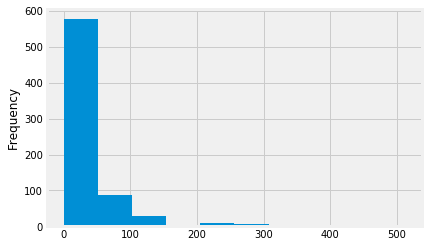

In [135]:
df['Fare'].plot(kind='hist');

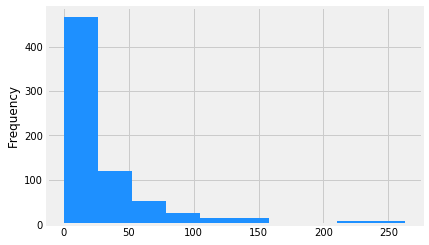

In [136]:
df = df[df['Fare'] < 500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [137]:
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

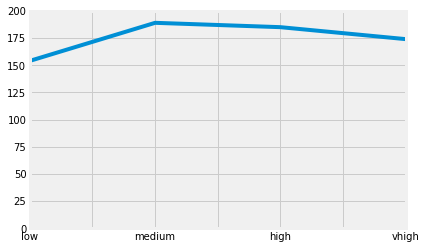

In [138]:
myresults.plot(ylim=(0,200))

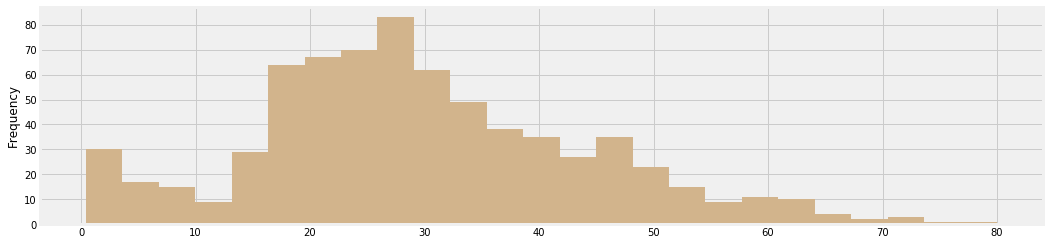

In [139]:
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan')

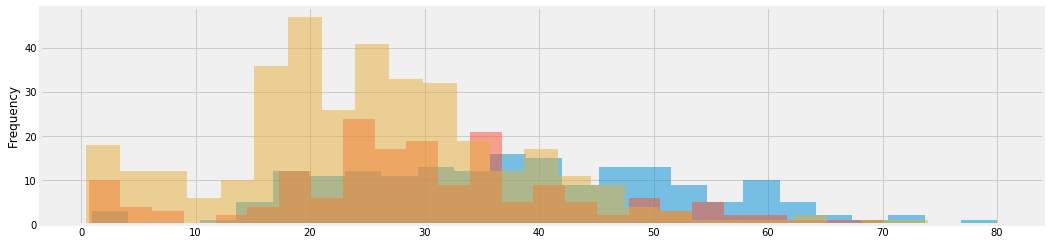

In [140]:
df[df['Pclass'] == 1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass'] == 2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass'] == 3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)

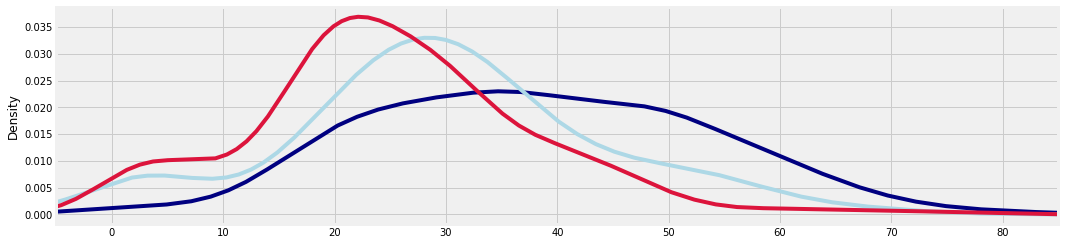

In [141]:
df[df['Pclass'] == 1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass'] == 2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
df[df['Pclass'] == 3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson')

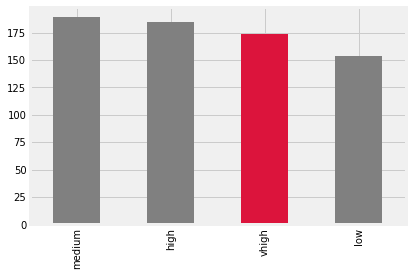

In [142]:
df['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray'])

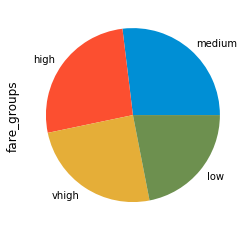

In [143]:
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4))

In [144]:
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


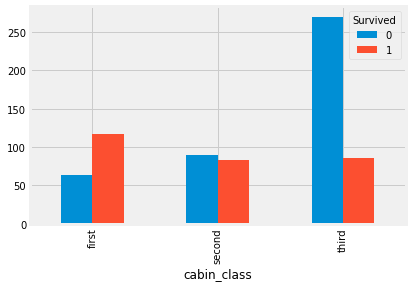

In [145]:
cab_death.plot(kind='bar')

In [146]:
cab_death1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


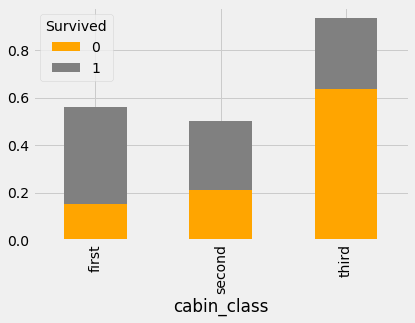

In [249]:
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray'])

In [148]:
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


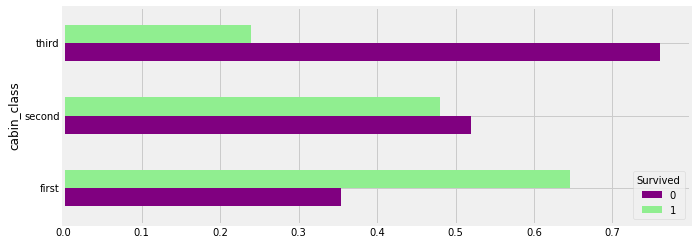

In [149]:
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4))

In [150]:
df['Age'].mean()

29.618011283497882

In [151]:
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

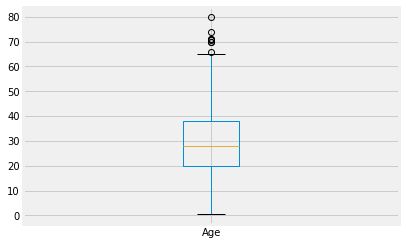

In [152]:
df['Age'].plot(kind='box')

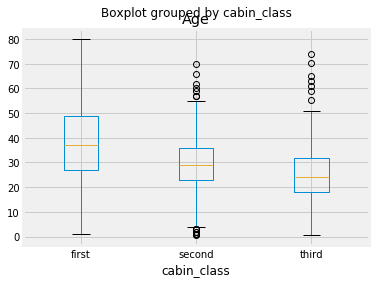

In [153]:
df.boxplot(column='Age', by='cabin_class')

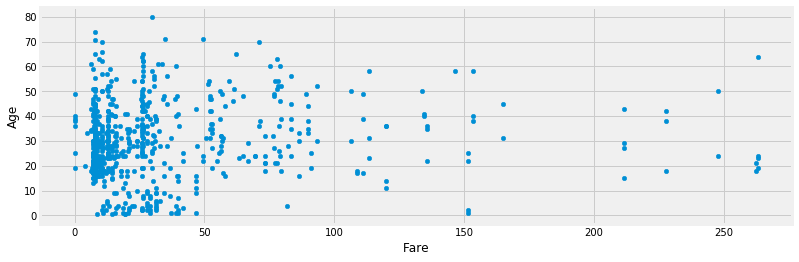

In [154]:
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4))

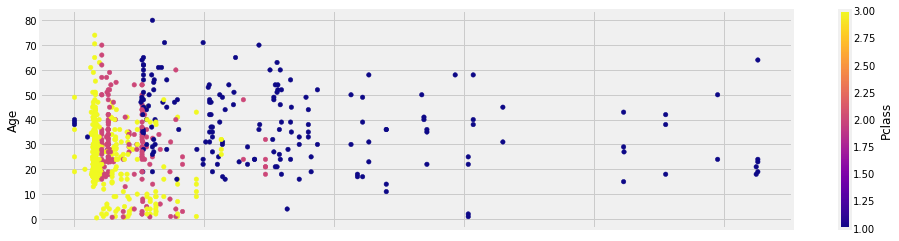

In [155]:
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4))

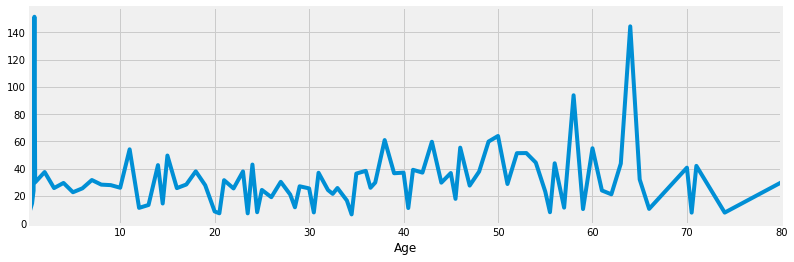

In [156]:
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4))

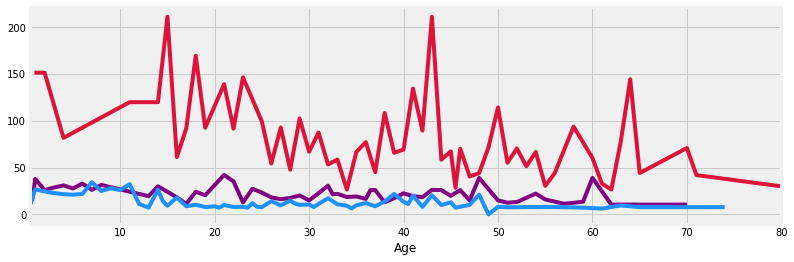

In [157]:
mycolors=['crimson', 'purple', 'dodgerblue']
for x in [1,2,3]:
    df[df['Pclass'] == x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [158]:
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


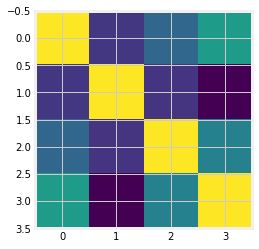

In [159]:
plt.imshow(corr_matrix)

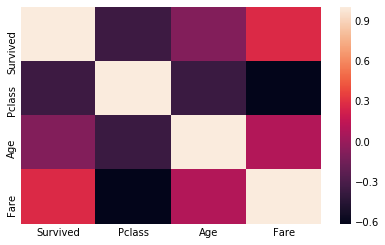

In [160]:
sns.heatmap(corr_matrix)

In [0]:
x =np.linspace(0,5,11)
y = x ** 2

In [162]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [163]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

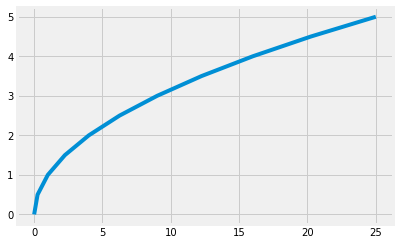

In [164]:
plt.plot(y, x)

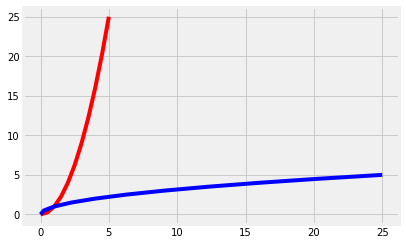

In [165]:
plt.plot(x,y, 'r')
plt.plot(y, x, 'b')

Text(0.5, 1.0, 'Title Title')

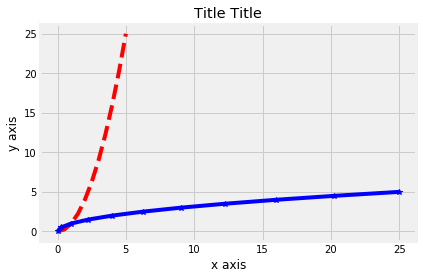

In [166]:
plt.plot(x,y, 'r--')
plt.plot(y, x, 'b*-')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Title Title')

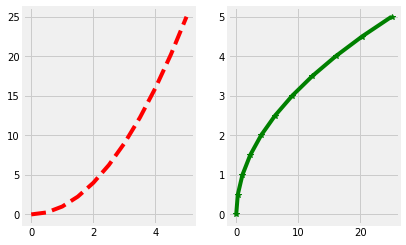

In [167]:
plt.subplot(1,2,1)
plt.plot(x, y, 'r--')
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-')

Text(0.5, 1.0, 'Title')

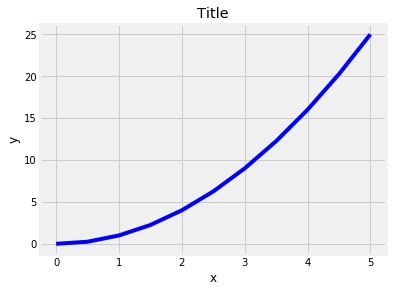

In [168]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x,y, 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Title')



Text(0.5, 1.0, 'title2')

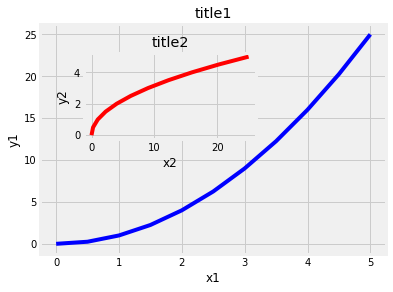

In [169]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x,y, 'b')
axes1.set_xlabel('x1')
axes1.set_ylabel('y1')
axes1.set_title('title1')

axes2.plot(y,x, 'r')
axes2.set_xlabel('x2')
axes2.set_ylabel('y2')
axes2.set_title('title2')

Text(0.5, 1.0, 'title')

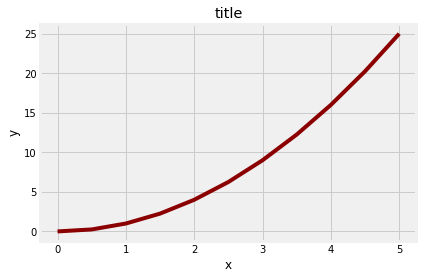

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=1)

axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

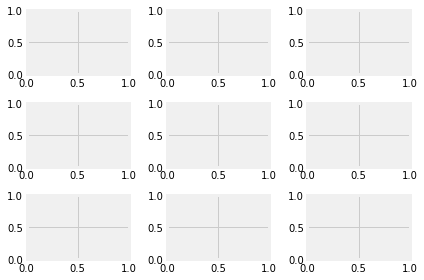

In [171]:
fig, axes = plt.subplots(nrows=3, ncols=3)

fig
plt.tight_layout()

In [172]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0106ad5ba8>,
      dtype=object)

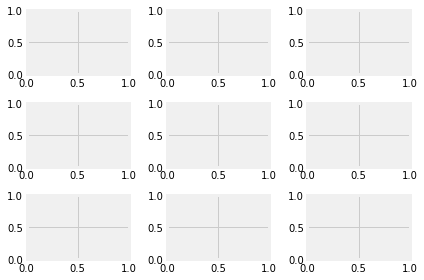

In [173]:
#no idea how to get this to work and it is not working in the lecture file either
#for ax in axes:
#    ax.plot(x, y, 'b')
#    ax.set_xlabel('x')
#    ax.set_ylabel('y')
#    ax.set_title('title')

# Display the figure object    
fig

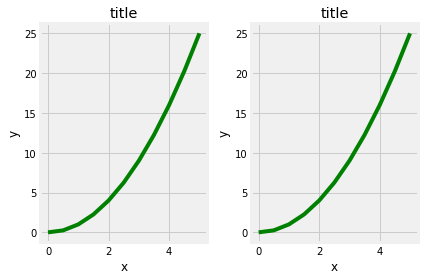

In [174]:
#and now i have no idea why this one works
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x,y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig
plt.tight_layout()

In [175]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'title')

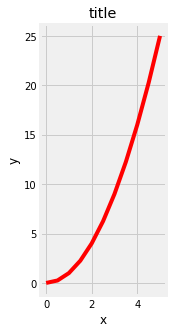

In [176]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x,y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

In [0]:
fig.savefig('filname.pdf', dpi=200)

In [178]:
ax.set_title('title')

Text(0.5, 1, 'title')

In [179]:
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(230.8, 0.5, 'y')

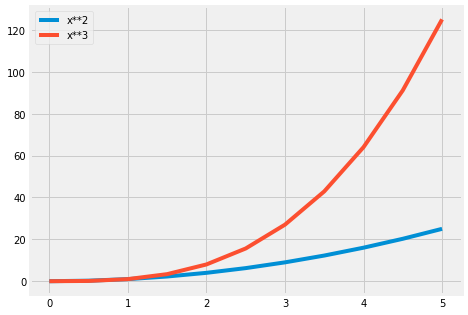

In [180]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label='x**2')
ax.plot(x, x**3, label='x**3')
ax.legend()

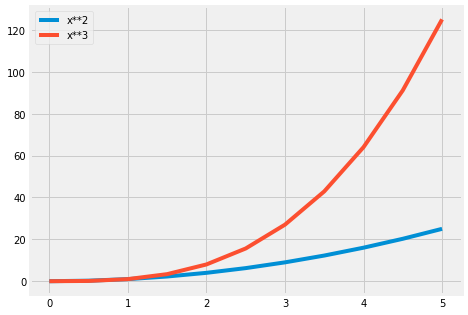

In [181]:
ax.legend()
fig

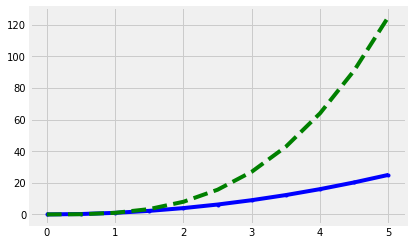

In [182]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')
ax.plot(x, x**3, 'g--')

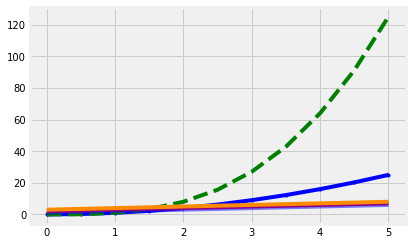

In [183]:
ax.plot(x, x+1, color='blue', alpha = 0.5)
ax.plot(x, x+2, color='#8B008B')
ax.plot(x, x+3, color='#FF8C00')
fig

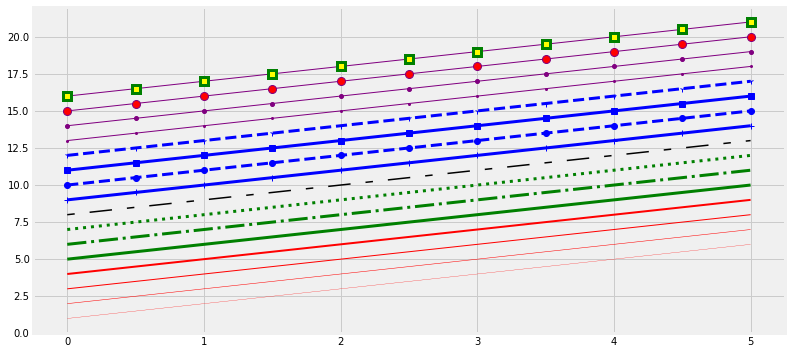

In [184]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color='red', linewidth=0.25)
ax.plot(x, x+2, color='red', linewidth=0.50)
ax.plot(x, x+3, color='red', linewidth=1.00)
ax.plot(x, x+4, color='red', linewidth=2.00)

ax.plot(x, x+5, color='green', lw=3, linestyle='-')
ax.plot(x, x+6, color='green', lw=3, ls='-.')
ax.plot(x, x+7, color='green', lw=3, ls=':')

line, = ax.plot(x, x+8, color='black', lw=1.50)
line.set_dashes([5, 10, 15, 10])

ax.plot(x, x+9, color='blue', lw=3, ls='-', marker='+')
ax.plot(x, x+10, color='blue', lw=3, ls='--', marker='o')
ax.plot(x, x+11, color='blue', lw=3, ls='-', marker='s')
ax.plot(x, x+12, color='blue', lw=3, ls='--', marker='1')

ax.plot(x, x+13, color='purple', lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color='purple', lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color='purple', lw=1, ls='-', marker='o', markersize=8, markerfacecolor='red')
ax.plot(x, x+16, color='purple', lw=1, ls='-', marker='s', markersize=8, markerfacecolor='yellow', markeredgewidth=3, markeredgecolor='green')

Text(0.5, 1.0, 'custom range')

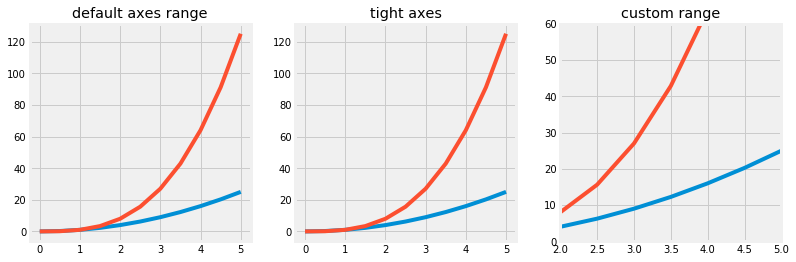

In [185]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes range')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2,5])
axes[2].set_title('custom range')

In [186]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
plt.style.use('fivethirtyeight')

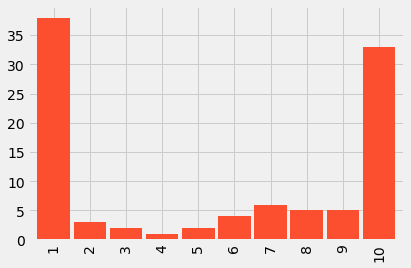

In [188]:
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9)

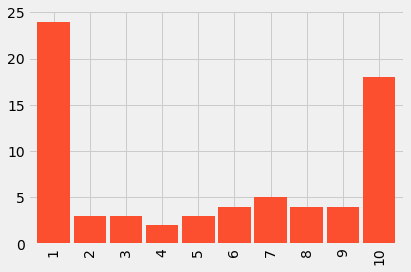

In [189]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

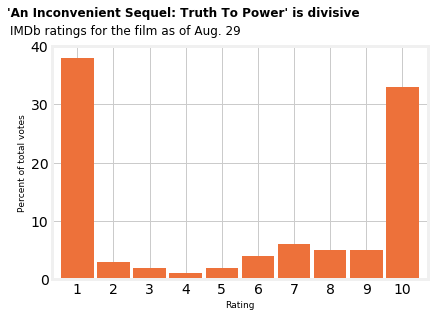

In [190]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')

fake.plot.bar(width=0.9, color='#ED713A')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
            fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42)

ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

ax.set_xticklabels(range(1, 11), rotation=0)
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10))

In [191]:
display(example)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df = df.set_index('timestamp')

In [0]:
lastday = df['2017-08-29']

In [196]:
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [197]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [198]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [199]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


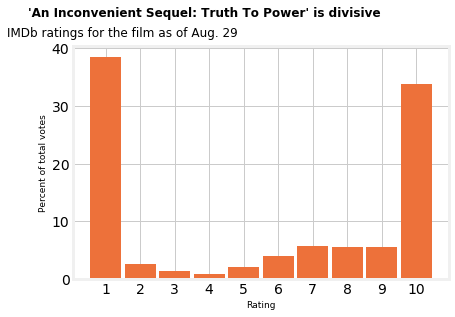

In [200]:
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color='#ED713A')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=0.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42)

ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10))

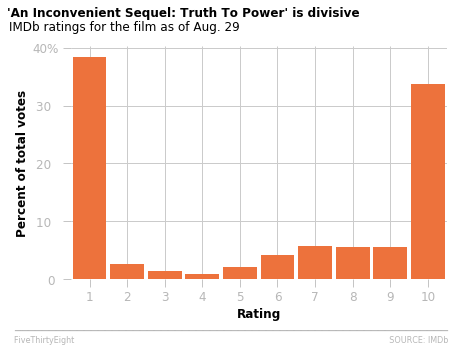

In [245]:
#finally done replicating the lecture code and now to actually do the assignment
#first goignt o try and improve the recreation of the graph
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color='#ED723C')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.3,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', 
        fontsize=12, 
        x=-1.15, 
        y=43)

ax.tick_params(length=8, color='#B7B7B7')

ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim(.5,10.5)

ax.set_xlabel('Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Percent of total votes', fontsize=12, fontweight='bold')

ax.text(x = -1, y= -8.5,
        s='______________________________________________________________',
        color='#B7B7B7')

ax.text(x = -1, y = -11,
        s='FiveThirtyEight                                                                                                                              SOURCE: IMDb', 
        fontsize=8,
        color='#B7B7B7')

ax.set_xticklabels(range(1,11), rotation=0, color='#B7B7B7', fontsize=12)
ax.set_xticks(range(1,11))
ax.set_yticklabels(['0 ', '10  ', '20  ', '30  ', '40%'], color='#B7B7B7', fontsize=12)
ax.set_yticks(range(0, 50, 10));

In [350]:
#recreating the "Good Girls Gone Meh" graph found at https://fivethirtyeight.com/wp-content/uploads/2014/10/hickey-feature-comics-4.png?w=575
dc = pd.read_csv('dc-wikia-data.csv')
dc

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,66302,Nadine West (New Earth),\/wiki\/Nadine_West_(New_Earth),Public Identity,Good Characters,NaN,NaN,Female Characters,NaN,Living Characters,NaN,NaN,NaN
6892,283475,Warren Harding (New Earth),\/wiki\/Warren_Harding_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [351]:
dc_alignment = pd.crosstab(dc['SEX'], dc['ALIGN'], normalize='index')
dc_alignment2 = dc_alignment[['Good Characters', 'Bad Characters']]
dc_alignment2['Neutral'] = 1 - dc_alignment['Bad Characters'] - dc_alignment['Good Characters']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [352]:
dc_alignment2.head()

ALIGN,Good Characters,Bad Characters,Neutral
SEX,,,
Female Characters,0.545507,0.341729,0.112765
Genderless Characters,0.300000,0.550000,0.150000
Male Characters,0.416309,0.502146,0.081545
Transgender Characters,0.000000,1.000000,0.000000


In [0]:
dc_alignment2_filtered = dc_alignment2.drop(['Genderless Characters', 'Transgender Characters'])

In [0]:
dc_graph_ready = dc_alignment2_filtered[['Good Characters', 'Neutral', 'Bad Characters']]
dc_graph_ready = dc_graph_ready.reindex(index=dc_graph_ready.index[::-1])

In [355]:
marvel = pd.read_csv('marvel-wikia-data.csv')
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [356]:
marvel_alignment = pd.crosstab(marvel['SEX'], marvel['ALIGN'], normalize='index')
marvel_alignment.head()

ALIGN,Bad Characters,Good Characters,Neutral Characters
SEX,,,
Agender Characters,0.465116,0.232558,0.302326
Female Characters,0.309546,0.487472,0.202981
Genderfluid Characters,0.000000,0.500000,0.500000
Male Characters,0.547824,0.304392,0.147783


In [357]:
marvel_alignment = marvel_alignment.drop(['Agender Characters', 'Genderfluid Characters'])
marvel_alignment.head()

ALIGN,Bad Characters,Good Characters,Neutral Characters
SEX,,,
Female Characters,0.309546,0.487472,0.202981
Male Characters,0.547824,0.304392,0.147783


In [0]:
marvel_graph_ready = marvel_alignment[['Good Characters', 'Neutral Characters', 'Bad Characters']]
marvel_graph_ready = marvel_graph_ready.reindex(index=marvel_graph_ready.index[::-1])

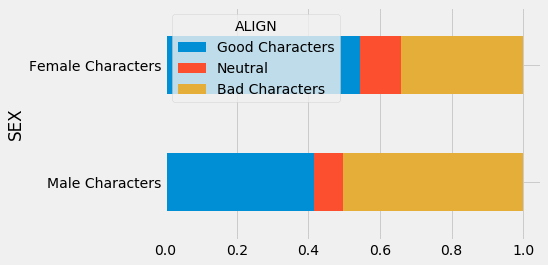

In [370]:
dc_graph_ready.plot.barh(stacked=True)

''

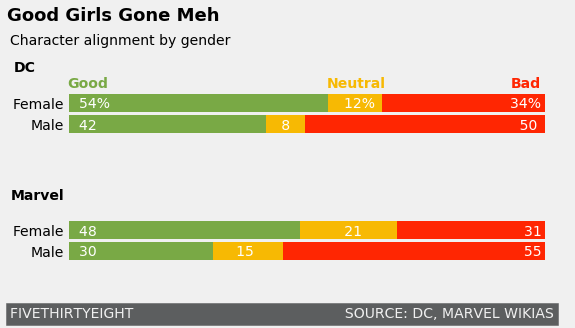

In [546]:
# i have the data so now its time to recreate the graph itself
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,4))
plt.style.use('fivethirtyeight')

fig.suptitle('Good Girls Gone Meh', fontsize=18, fontweight='bold',x=0.16)
fig.text(s='Character alignment by gender', x=-.02, y=.85)
fig.text(s='Good', color='#79A945', x=.08, y=.7, fontsize=14, fontweight='bold')
fig.text(s='Neutral', color='#F7B903', x=.53, y=.7, fontsize=14, fontweight='bold')
fig.text(s='Bad', color='#FF2602', x=.85, y=.7, fontsize=14, fontweight='bold')
fig.text(s='54%                                                    12%                              34%', x=.1, y=.63,
         color='white')
fig.text(s='42                                         8                                                   50', x=.1, y=.555,
         color='white')
fig.text(s='48                                                       21                                    31', x=.1, y=.185,
         color='white')
fig.text(s='30                               15                                                            55', x=.1, y=.115,
         color='white')
fig.text(x=-.02, y=-.1, s='FIVETHIRTYEIGHT                                               SOURCE: DC, MARVEL WIKIAS', fontsize=14, color='#f0f0f0', backgroundcolor='#5C5E5F')
#the dc portion of the chart
ax[0].barh(y=[0,1.2],
           width=dc_graph_ready['Good Characters'],
           height=1,
           color='#79A945')
ax[0].barh(y=[0,1.2], 
           width=dc_graph_ready['Neutral'],
           height=1, 
           left=dc_graph_ready['Good Characters'],
           color='#F7B903')
ax[0].barh(y=[0,1.2], 
           width=dc_graph_ready['Bad Characters'], 
           height=1, 
           left=dc_graph_ready['Good Characters']+dc_graph_ready['Neutral'],
           color='#FF2602')

ax[0].set_title('DC', fontsize=14, fontweight='bold', x=-.085, y=.6)
ax[0].set_yticklabels(['Male', 'Female'])
ax[0].set_yticks([0,1.2])
ax[0].set_ylim((-1,5))
ax[0].set_xticklabels('')
ax[0].grid(False)

#the marvel portion of the chart
ax[1].barh(y=[0,1.2], 
           width=marvel_graph_ready['Good Characters'], 
           height=1,
           color='#79A945')
ax[1].barh(y=[0,1.2], 
           width=marvel_graph_ready['Neutral Characters'], 
           height=1, 
           left=marvel_graph_ready['Good Characters'],
           color='#F7B903')
ax[1].barh(y=[0,1.2], 
           width=marvel_graph_ready['Bad Characters'], 
           height=1., 
           left=marvel_graph_ready['Good Characters']+marvel_graph_ready['Neutral Characters'],
           color='#FF2602')

ax[1].set_title('Marvel', fontsize=14, fontweight='bold', x=-.06, y=.6)
ax[1].set_yticklabels(['Male', 'Female'])
ax[1].set_yticks([0,1.2])
ax[1].set_ylim((-1,5))
ax[1].set_xticklabels('')
ax[1].grid(False)


;
#i know its not exact but ive put as much time into it as i can

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work 